# **Exploratory Data Analysis for Bot Detection**




In [1]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



In [11]:
# Load the dataset
file_path = "../Dataset/training_data.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,1.953701e+08,195370058,kanyejordan,NaN,This is what I do. I drop truth bombs.,NaN,2925,3,139,9/26/2010 14:45,0,False,708,en,"Status(in_reply_to_status_id=None, favorited=F...",True,False,False,Kanye Jordan,1
1,7.950000e+17,7.95E+17,astronaut_bot,NaN,Keeping an eye on astronauts coming and going....,NaN,9,0,5,Fri Nov 04 12:11:27 +0000 2016,0,False,6,en,{'created_at': 'Tue Nov 22 16:52:31 +0000 2016...,True,False,False,Astronaut Notifier,1
2,2.976541e+09,2976541239,TheRiddlerBot,"Coimbra, Portugal",Solve the riddle by replying only the name of ...,https://t.co/1v8BON9QpT,132,46,24,1/13/2015 15:10,740,False,7346,en,"Status(contributors=None, truncated=False, tex...",True,False,False,TheRiddlerBot,1
3,2.243832e+08,224383150,mlegoudes262,NaN,NaN,NaN,54,1351,0,Wed Dec 08 21:29:31 +0000 2010,2,False,6,en,"{'truncated': False, 'entities': {'user_mentio...",True,False,False,Laurie Poulsen,1
4,1.134712e+07,11347122,GavinNewsom,California,Husband & father. 49th Lt. Gov. of California ...,https://t.co/XrGnfzTDJD,1300380,24248,7089,Wed Dec 19 19:53:42 +0000 2007,4184,True,8536,en,"{u'contributors': None, u'truncated': True, u'...",False,False,False,Gavin Newsom,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1562 non-null   float64
 1   id_str                 1562 non-null   object 
 2   screen_name            1562 non-null   object 
 3   location               989 non-null    object 
 4   description            1343 non-null   object 
 5   url                    760 non-null    object 
 6   followers_count        1562 non-null   int64  
 7   friends_count          1562 non-null   int64  
 8   listedcount            1562 non-null   int64  
 9   created_at             1562 non-null   object 
 10  favourites_count       1562 non-null   int64  
 11  verified               1562 non-null   bool   
 12  statuses_count         1562 non-null   int64  
 13  lang                   1562 non-null   object 
 14  status                 1374 non-null   object 
 15  defa

In [15]:
# Convert boolean columns to integer (0 or 1)
bool_cols = ["verified", "default_profile", "default_profile_image"]
df[bool_cols] = df[bool_cols].astype(int)

# Verify changes
print(df.dtypes[bool_cols])


verified                 int32
default_profile          int32
default_profile_image    int32
dtype: object


#Data Visualization
Visualizing the distribution of numerical features to understand data patterns.
This helps in identifying skewness, outliers, and differences between bot and non-bot accounts.


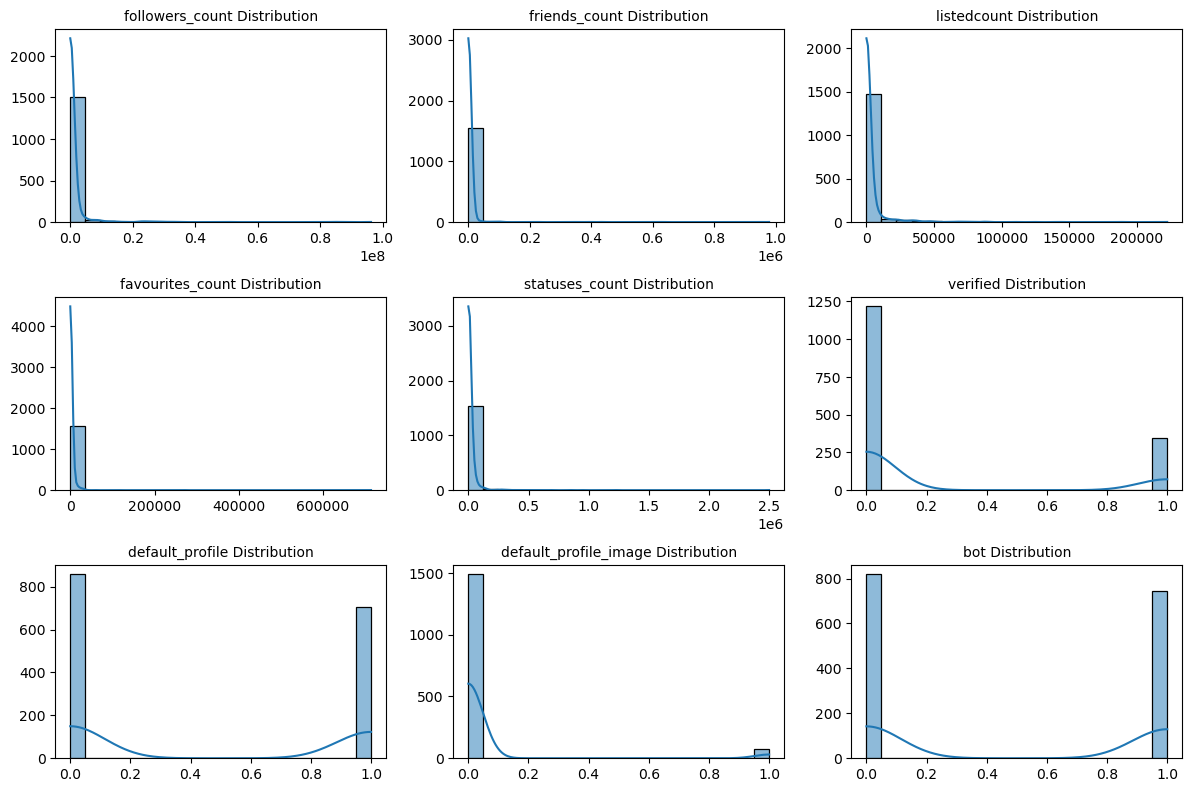

In [17]:
# ---------------- Feature Distributions (Histograms & KDE) ---------------- #

# Define numeric columns for visualization
num_cols = [
    "followers_count", "friends_count", "listedcount", "favourites_count",
    "statuses_count", "verified", "default_profile", "default_profile_image", "bot"
]

# Reduce figure size while maintaining clarity
plt.figure(figsize=(12, 8))

# Loop through numeric columns and plot
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"{col} Distribution", fontsize=10)  # Reduce title font size
    plt.xlabel("")  # Remove x-labels for cleaner visuals
    plt.ylabel("")

plt.tight_layout(pad=1)  # Adjust padding for compact layout
plt.show()



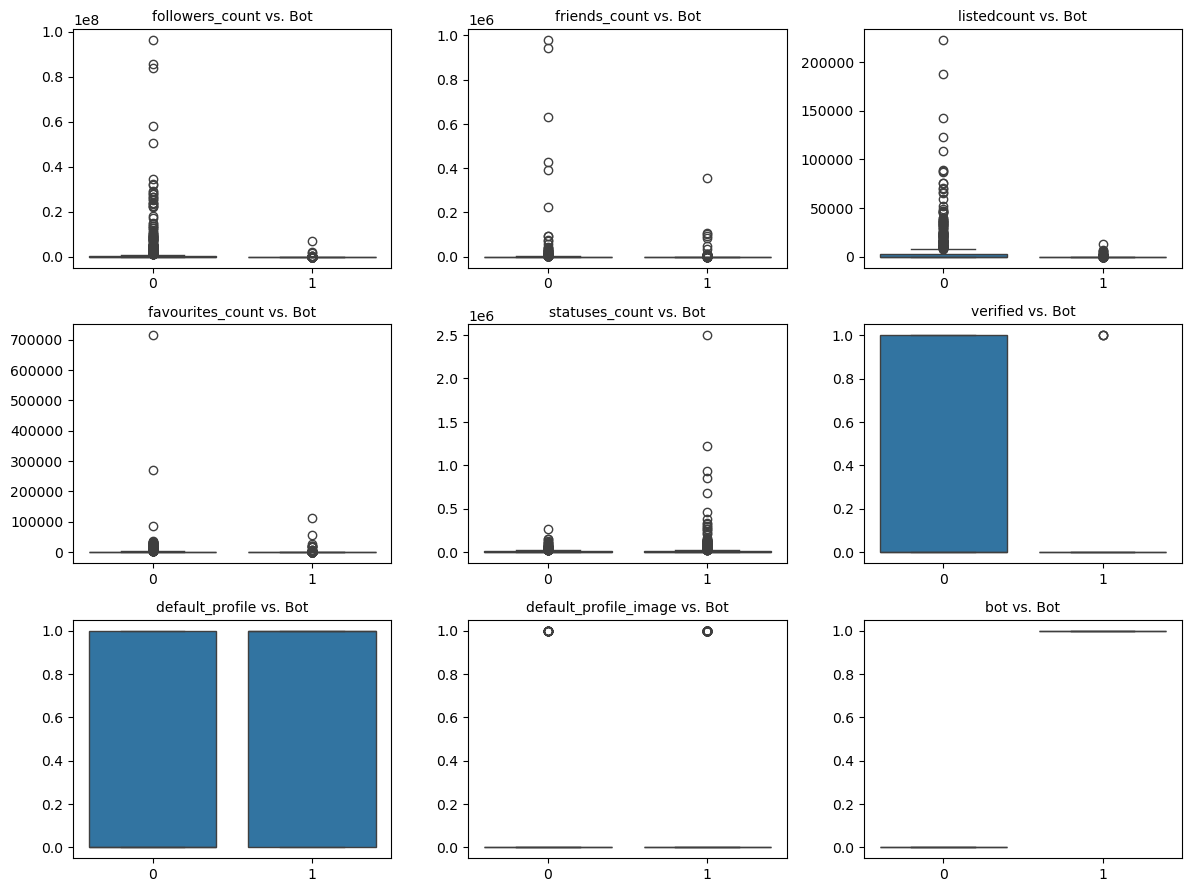

In [19]:
# ---------------- Boxplots vs. Bot Label ---------------- #

# Reduce figure size while maintaining readability
plt.figure(figsize=(12, 9))

# Loop through numeric columns and plot boxplots
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df["bot"], y=df[col])
    plt.title(f"{col} vs. Bot", fontsize=10)  # Smaller font size for compact view
    plt.xlabel("")  # Remove x-labels for cleaner visualization
    plt.ylabel("")

plt.tight_layout(pad=1)  # Adjust padding for compact layout
plt.show()


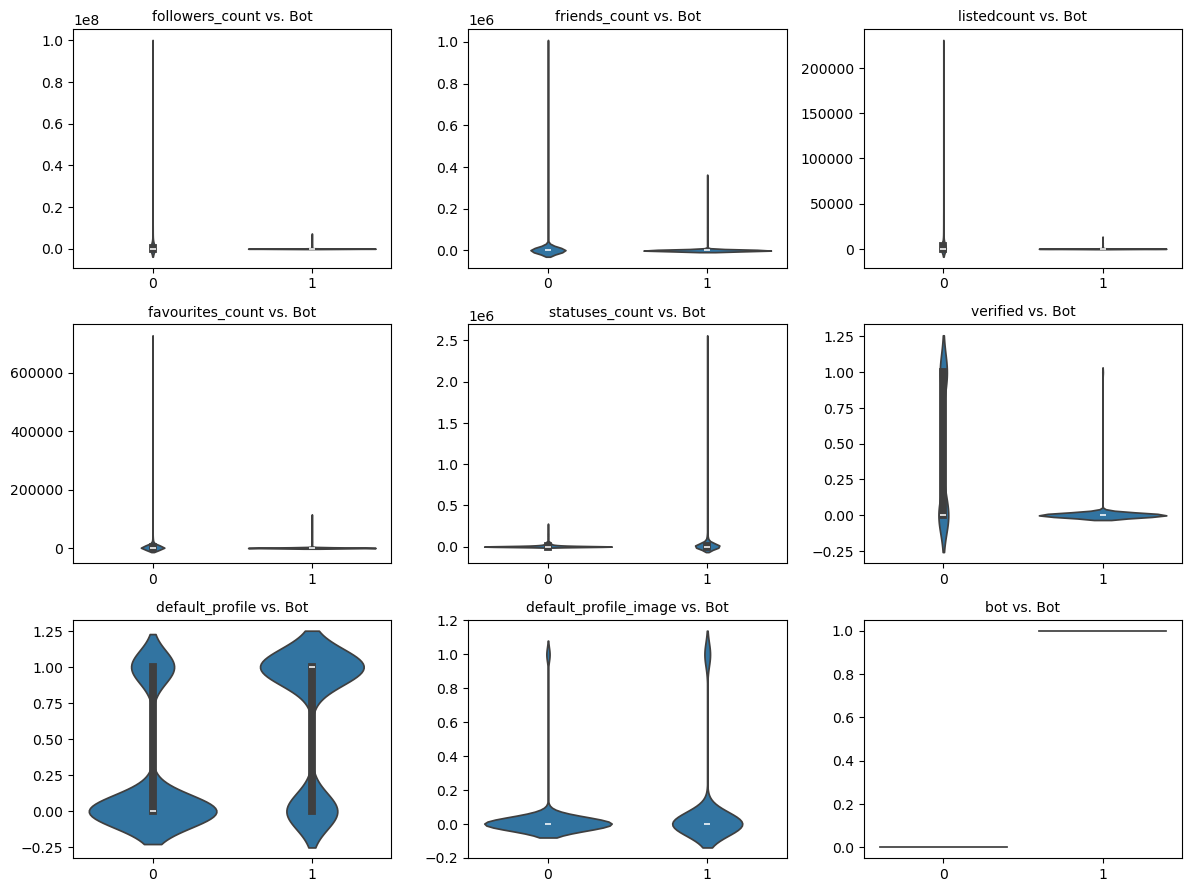

In [21]:
# ---------------- Violin Plots vs. Bot Label ---------------- #

plt.figure(figsize=(12, 9))

# Loop through numeric columns and plot violin plots
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(x=df["bot"], y=df[col])
    plt.title(f"{col} vs. Bot", fontsize=10)
    plt.xlabel("")  # Remove x-labels for cleaner visualization
    plt.ylabel("")

plt.tight_layout(pad=1)  # Adjust padding for compact layout
plt.show()


#Key Takeaways
- Bots generally have lower followers, friends, and listed counts.

- Verified accounts are almost always non-bots.

- Bots tend to have default profiles and default profile images.

- Non-bots have a much wider variation in engagement metrics (followers, statuses, and favourites).

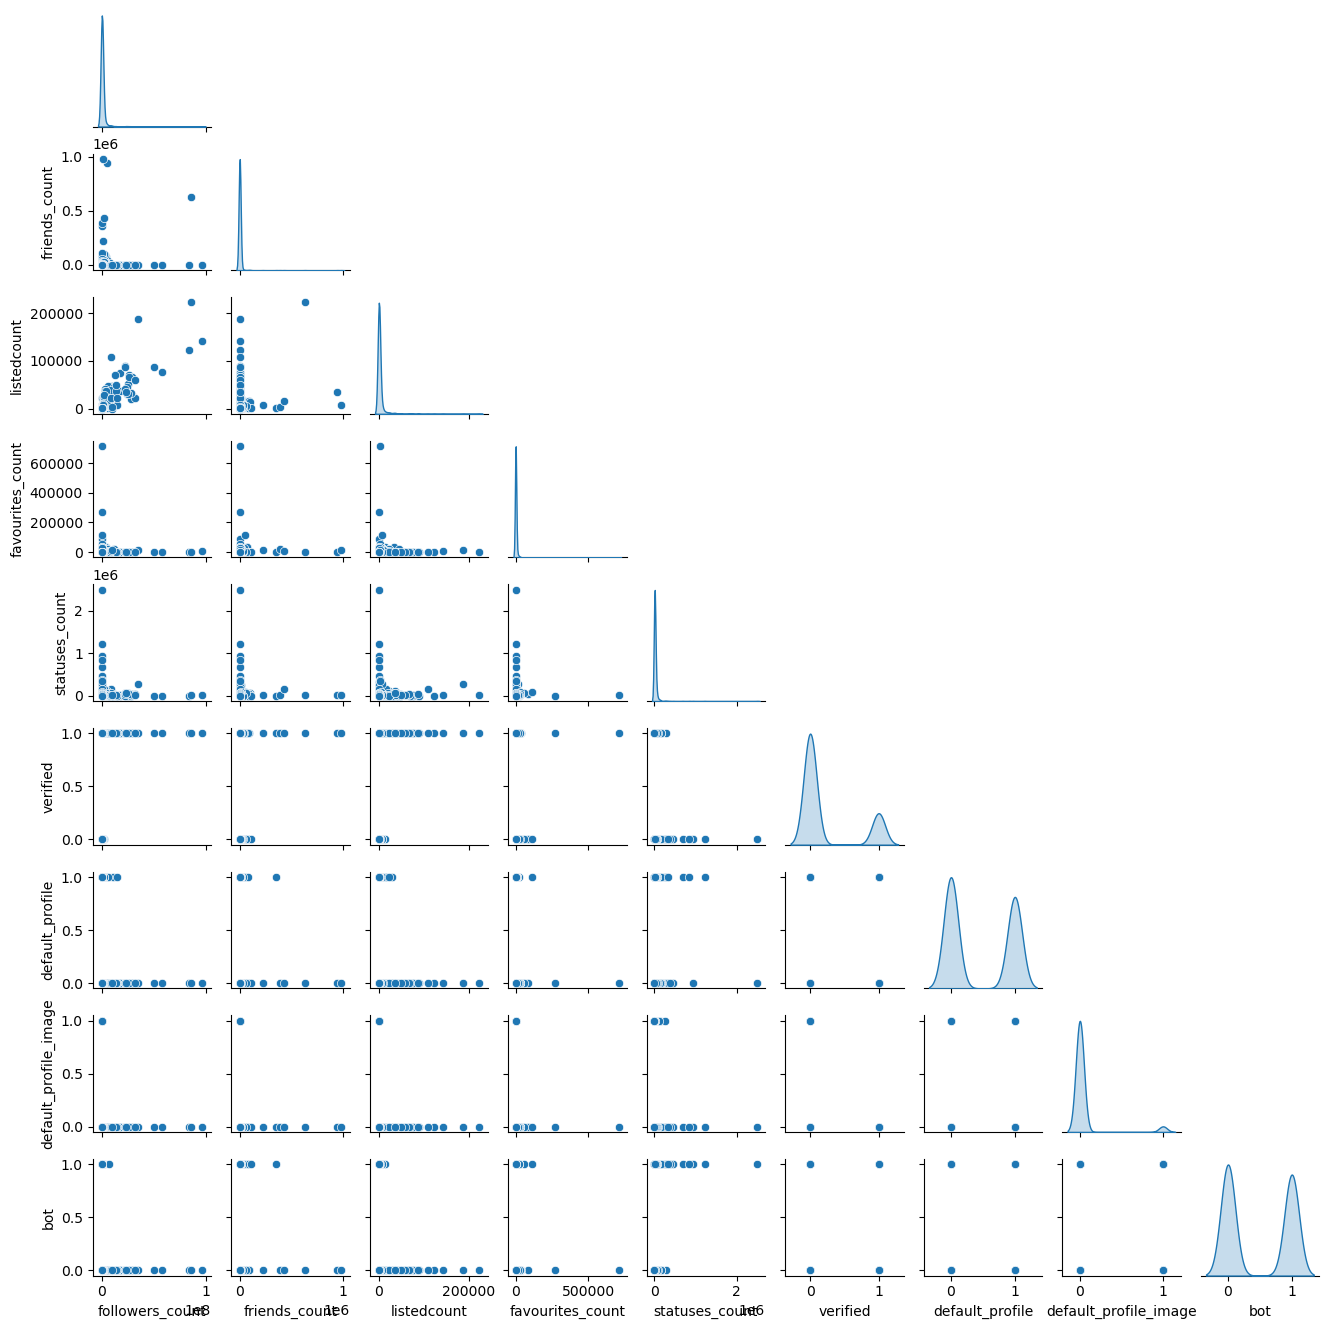

In [24]:
# Pair Plot with Reduced Size
sns.pairplot(df[num_cols], diag_kind="kde", corner=True, height=1.5)  # Reduce height
plt.show()


**-**Bots tend to have lower engagement and profile customization.

**-**Verified accounts are strong indicators of non-bots.

**-**Some features, like followers_count and listedcount, show slight correlation but are not enough alone to distinguish bots from non-bots.

**-**Bots often appear in clusters with lower values in most metrics.

#Correlation Heatmap
This heatmap visualizes the correlation between numerical features.
Strong correlations indicate possible redundancy, while weak correlations may suggest independent variables.
Understanding feature relationships helps in feature selection and improving model performance.

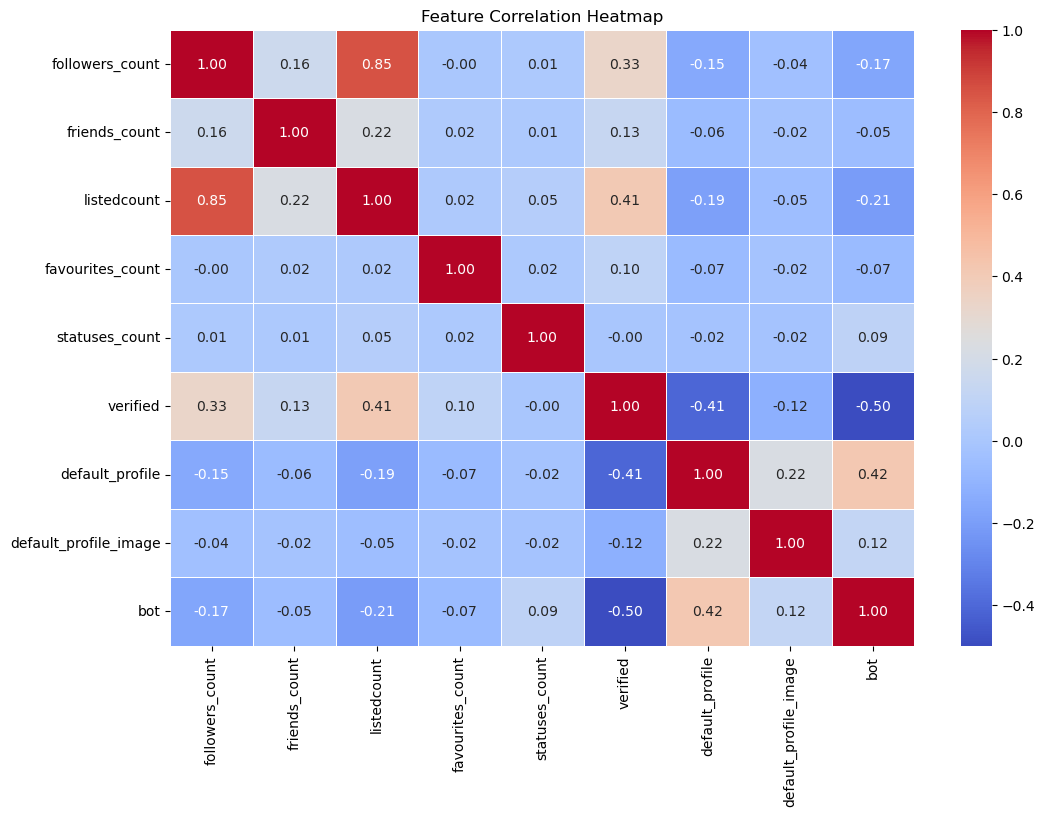

In [28]:
# ---------------- Correlation Heatmap ---------------- #
plt.figure(figsize=(12, 8))
corr_matrix = df[num_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#Insights for Bot Detection:

**-**  Bots are more likely to have a default profile and a default profile image.

**-**  Bots are less likely to be verified.

**-**  followers_count and listedcount do not strongly indicate bot behavior.
